# Project: Investigate FBI Gun Data
## Datasets:
###  [NICS data](https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4db8_gun-data/gun-data.xlsx)
### [ U.S. census data](https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> **Overview**: The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.
>
> ● The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
>
> ● The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year..

> ● Dependent Variable: the ['totals','Population estimates, July 1, 2016,  (V2016)','Population estimates base, April 1, 2010,  (V2016)'] variable in gun data.
>
> ● Independent Variables: 'states'

Questions to answer:
1. What census data is most associated with high gun registration?

2. Which countries have had the highest gun registration in 2010, 2016?

3. What is the most purchased type of gun in 2017?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [15]:
#ploading files
guns=pd.read_excel('gun_data.xlsx')
census=pd.read_csv('U.S. Census Data.csv')

#### Investigateing Guns

In [3]:
guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


we care only about totals column --> we need to exclude other columns

In [4]:
#some statistics about guns
guns.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [5]:
#let's get to know more about columns
guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

month has object data type which we have to adjust

In [6]:
#month to datetime
guns['month']=pd.to_datetime(guns['month'])

In [7]:
#check if it helps
guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

#Cleaning guns Dataframe

#### Investigating Census

In [16]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [17]:
#some statistics about census

census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [10]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

we have all columns with object data type --> we need to get that right

we have null values

In [18]:
# fact note has many null values so we will drop it
census.drop(['Fact Note'],axis=1,inplace=True)

In [21]:
#drop null rows
census.dropna(axis=0,inplace=True)
census

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


In [22]:
#Check the number of states in census
index_census_state = census.iloc[0].index[2:]
index_census_state

Index(['Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [23]:
len(index_census_state)

49

In [24]:
# check how many states in guns
index_gun_state=list(guns.state.unique())
index_gun_state

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Mariana Islands',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [85]:
len(index_gun_state)

49

In [25]:
# why the lengths of the indice are different? Let's find out: finding out the missing states
ex_states=[]
for s in index_gun_state:
    if s not in index_census_state:
        print(s)
        ex_states.append(s)
ex_states

Alabama
District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


['Alabama',
 'District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands']

so there are 5 countries in census need to be excluded

In [26]:
#drop states from guns that didn't match with states in census
guns=guns[guns.state.isin(ex_states)==False]
guns

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09-01,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11-01,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11-01,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11-01,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11-01,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


<a id='eda'></a>
## Exploratory Data Analysis

In [30]:
guns.groupby('state').sum()['totals']

state
Alaska             1137643
Arizona            4425714
Arkansas           3752633
California        19014063
Colorado           6058482
Connecticut        3168126
Delaware            491369
Florida           11695777
Georgia            7209942
Hawaii              197580
Idaho              1968134
Illinois          15471534
Indiana            7737172
Iowa               2297156
Kansas             2624669
Kentucky          29762434
Louisiana          4705057
Maine              1257457
Maryland           2035652
Massachusetts      2571321
Michigan           7254279
Minnesota          6279271
Mississippi        3576312
Missouri           6549018
Montana            1884124
Nebraska           1136209
Nevada             1731797
New Hampshire      1583148
New Jersey         1145846
New Mexico         2076591
New York           4643828
North Carolina     7777689
North Dakota        947440
Ohio               8462744
Oklahoma           4584454
Oregon             3751061
Pennsylvania      1313

Q1: What census data is most associated with high background check with gun sales?

In [27]:
#FILTER GUNS COLUMNS
guns_states=guns[['month','state','totals']]

In [28]:
guns_states.head()

,month,state,totals
1,2017-09-01,Alaska,6303
2,2017-09-01,Arizona,28394
3,2017-09-01,Arkansas,17747
4,2017-09-01,California,123506
5,2017-09-01,Colorado,35873


In [29]:
guns_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 12484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   11123 non-null  datetime64[ns]
 1   state   11123 non-null  object        
 2   totals  11123 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 347.6+ KB


Exploring states in 2016 & 2010

In [31]:
#guns data in 2016
guns_states16=guns_states[guns_states['month']=='2016-07-01']
guns_states16.head()

,month,state,totals
771,2016-07-01,Alaska,6793
772,2016-07-01,Arizona,34496
773,2016-07-01,Arkansas,19378
774,2016-07-01,California,190218
775,2016-07-01,Colorado,43094


In [32]:
#guns data in 2010
guns_states10=guns_states[guns_states['month']=='2010-04-01']
guns_states10.head()

,month,state,totals
4896,2010-04-01,Alaska,6411
4897,2010-04-01,Arizona,16578
4898,2010-04-01,Arkansas,14563
4899,2010-04-01,California,80750
4900,2010-04-01,Colorado,23609


In [33]:
#merge two years
guns_years=pd.concat([guns_states10,guns_states16],axis=0)
guns_years

,month,state,totals
4896,2010-04-01,Alaska,6411
4897,2010-04-01,Arizona,16578
4898,2010-04-01,Arkansas,14563
4899,2010-04-01,California,80750
4900,2010-04-01,Colorado,23609
...,...,...,...
820,2016-07-01,Virginia,43574
821,2016-07-01,Washington,47887
822,2016-07-01,West Virginia,16791
823,2016-07-01,Wisconsin,38922


In [34]:
#Reset index
guns_years.reset_index(drop=True, inplace=True)
guns_years

,month,state,totals
0,2010-04-01,Alaska,6411
1,2010-04-01,Arizona,16578
2,2010-04-01,Arkansas,14563
3,2010-04-01,California,80750
4,2010-04-01,Colorado,23609
...,...,...,...
93,2016-07-01,Virginia,43574
94,2016-07-01,Washington,47887
95,2016-07-01,West Virginia,16791
96,2016-07-01,Wisconsin,38922


In [35]:
guns_years.rename(columns={'state':'states'},inplace=True)

In [36]:
#Making copy of census 
census2=census.copy()
census2

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


In [37]:
#making fact column as index
census2.set_index('Fact',inplace=True)

In [38]:
#trans the columns and rows 
census2=census2.T.reset_index()

In [39]:
census2.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [40]:
#rename index
census2.rename(columns={'index':'states'},inplace=True)

In [41]:
#explor census2
census2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   states                                                                                  50 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 4   Population, Census, April 1, 2010                                                       50 non-null     object
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                          

In [42]:
#census in 2016
census16=census2[['states','Population estimates, July 1, 2016,  (V2016)']]
census16.head()

Fact,states,"Population estimates, July 1, 2016, (V2016)"
0,Alabama,"4,863,300"
1,Alaska,"741,894"
2,Arizona,"6,931,071"
3,Arkansas,"2,988,248"
4,California,"39,250,017"


In [43]:
#Convert states to float  
census16['states']= pd.to_numeric(census16['states'], downcast='float', errors='ignore')
census16.head()

C:\Users\wwwes\AppData\Local\Temp\ipykernel_10876\1607491589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census16['states']= pd.to_numeric(census16['states'], downcast='float', errors='ignore')


Fact,states,"Population estimates, July 1, 2016, (V2016)"
0,Alabama,"4,863,300"
1,Alaska,"741,894"
2,Arizona,"6,931,071"
3,Arkansas,"2,988,248"
4,California,"39,250,017"


In [44]:
#Replace ',' to this ''.  
census16['Population estimates, July 1, 2016,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)
#Convert to float and ignore the error    
census16['Population estimates, July 1, 2016,  (V2016)']= pd.to_numeric(census16['Population estimates, July 1, 2016,  (V2016)'], downcast='float', errors='ignore')
census16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   states                                        50 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)  50 non-null     float32
dtypes: float32(1), object(1)
memory usage: 728.0+ bytes


C:\Users\wwwes\AppData\Local\Temp\ipykernel_10876\342731835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census16['Population estimates, July 1, 2016,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)
C:\Users\wwwes\AppData\Local\Temp\ipykernel_10876\342731835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census16['Population estimates, July 1, 2016,  (V2016)']= pd.to_numeric(census16['Population estimates, July 1, 2016,  (V2016)'], downcast='float', errors='ignore')


In [45]:
#census in 2010
census10=census2[['states','Population estimates base, April 1, 2010,  (V2016)']]
census10.head()

Fact,states,"Population estimates base, April 1, 2010, (V2016)"
0,Alabama,"4,780,131"
1,Alaska,"710,249"
2,Arizona,"6,392,301"
3,Arkansas,"2,916,025"
4,California,"37,254,522"


In [46]:
#Convert states to float  
census10['states']= pd.to_numeric(census10['states'], downcast='float', errors='ignore')
#Replace ',' to this ''.  
census10['Population estimates base, April 1, 2010,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)
#Convert to float and ignore the error    
census10['Population estimates base, April 1, 2010,  (V2016)']= pd.to_numeric(census10['Population estimates base, April 1, 2010,  (V2016)'], downcast='float', errors='ignore')
census10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   states                                              50 non-null     object 
 1   Population estimates base, April 1, 2010,  (V2016)  50 non-null     float32
dtypes: float32(1), object(1)
memory usage: 728.0+ bytes


C:\Users\wwwes\AppData\Local\Temp\ipykernel_10876\4014176174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census10['states']= pd.to_numeric(census10['states'], downcast='float', errors='ignore')
C:\Users\wwwes\AppData\Local\Temp\ipykernel_10876\4014176174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census10['Population estimates base, April 1, 2010,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)
C:\Users\wwwes\AppData\Local\Temp\ipykernel_10876\4014176174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [47]:
#Merge census 2010 and 2016
census_years = census10.merge(census16, on='states', how='left')
census_years.head()

Fact,states,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)"
0,Alabama,4780131.0,4863300.0
1,Alaska,710249.0,741894.0
2,Arizona,6392301.0,6931071.0
3,Arkansas,2916025.0,2988248.0
4,California,37254520.0,39250016.0


In [48]:
census_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   states                                              50 non-null     object 
 1   Population estimates base, April 1, 2010,  (V2016)  50 non-null     float32
 2   Population estimates, July 1, 2016,  (V2016)        50 non-null     float32
dtypes: float32(2), object(1)
memory usage: 1.2+ KB


In [50]:
gun_years = guns_states10.merge(guns_states16, on='state', how='left')
gun_years.head()

,month_x,state,totals_x,month_y,totals_y
0,2010-04-01,Alaska,6411,2016-07-01,6793
1,2010-04-01,Arizona,16578,2016-07-01,34496
2,2010-04-01,Arkansas,14563,2016-07-01,19378
3,2010-04-01,California,80750,2016-07-01,190218
4,2010-04-01,Colorado,23609,2016-07-01,43094


In [51]:
gun_years.tail()

,month_x,state,totals_x,month_y,totals_y
44,2010-04-01,Virginia,44137,2016-07-01,43574
45,2010-04-01,Washington,27816,2016-07-01,47887
46,2010-04-01,West Virginia,11180,2016-07-01,16791
47,2010-04-01,Wisconsin,16471,2016-07-01,38922
48,2010-04-01,Wyoming,4013,2016-07-01,4585


In [52]:
gun_years.rename(columns={'state':'states'},inplace=True)

In [55]:
def percentiles (n):
    return n*100

In [53]:
# Checking gun per capita in 2010
capita_2010 = gun_years['totals_x'].sum()/census_years['Population estimates base, April 1, 2010,  (V2016)'].sum()
capita_2010

0.0039106641553181415

In [56]:
#persent of capita_2010
percentiles(capita_2010)

0.39106641553181415

In [57]:
# Checking gun per capita in 2016
capita_2016 = gun_years['totals_y'].sum()/census_years['Population estimates, July 1, 2016,  (V2016)'].sum()
capita_2016

0.006626197172852974

In [58]:
#persent of capita_2016
percentiles(capita_2016)

0.6626197172852973

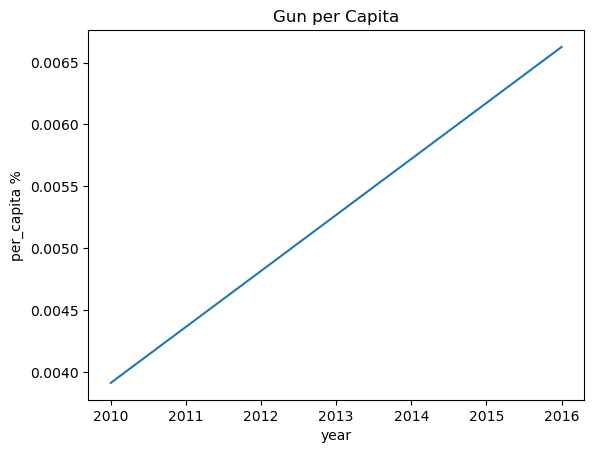

In [59]:
#comparison per capita
year = [2010, 2016]
per_capita = [capita_2010, capita_2016]

plt.title('Gun per Capita')
plt.xlabel('year')
plt.ylabel('per_capita %')
plt.plot(year, per_capita)
plt.show()

Answers :
> Gun per capita in 2010 is 0.39781327392522886 %.
>
> Gun per capita in 2016 is 0.67779340497762697 %.

Q2: Which countries have had the highest gun registration in 2010, 2016?

In [60]:
#first we mrege all
all_guns=gun_years.merge(census_years,on='states',how='left')
all_guns

,month_x,states,totals_x,month_y,totals_y,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)"
0,2010-04-01,Alaska,6411,2016-07-01,6793,710249.0,741894.0
1,2010-04-01,Arizona,16578,2016-07-01,34496,6392301.0,6931071.0
2,2010-04-01,Arkansas,14563,2016-07-01,19378,2916025.0,2988248.0
3,2010-04-01,California,80750,2016-07-01,190218,37254520.0,39250016.0
4,2010-04-01,Colorado,23609,2016-07-01,43094,5029324.0,5540545.0
5,2010-04-01,Connecticut,15922,2016-07-01,29755,3574114.0,3576452.0
6,2010-04-01,Delaware,1439,2016-07-01,4494,897936.0,952065.0
7,2010-04-01,Florida,42794,2016-07-01,125208,18804592.0,20612440.0
8,2010-04-01,Georgia,24065,2016-07-01,49183,9688680.0,10310371.0
9,2010-04-01,Hawaii,963,2016-07-01,1565,1360301.0,1428557.0


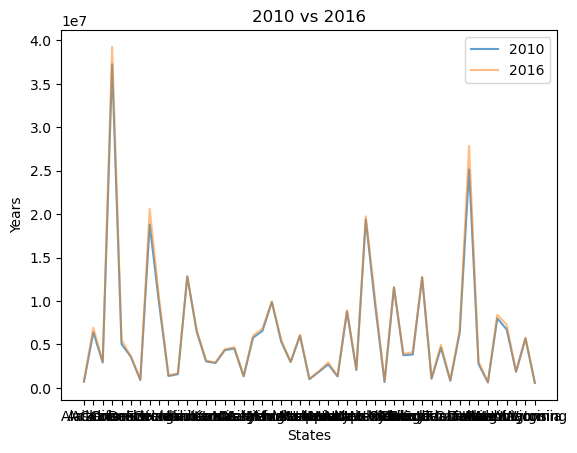

In [78]:
#plotting 2010 vs 2016
plt.title('2010 vs 2016')
plt.xlabel('States')
plt.ylabel('Years')
x=all_guns['states']
y=all_guns['Population estimates base, April 1, 2010,  (V2016)']
z=all_guns['Population estimates, July 1, 2016,  (V2016)']
plt.plot(x,y,label='2010',alpha=0.7)
plt.plot(x,z,label='2016',alpha=0.5)
plt.legend()
plt.show()

Text(0, 0.5, 'Totals')

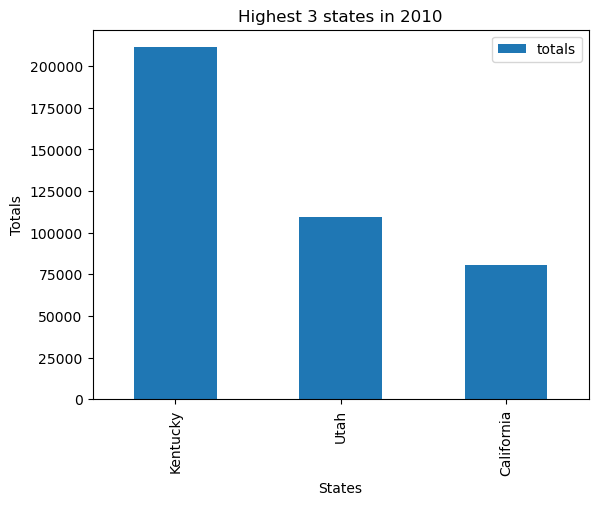

In [65]:
#Highest 3 states in 2010
guns_states10.sort_values(by=['totals'], axis = 0, ascending = False).head(3).plot.bar(x='state',y='totals');
plt.title('Highest 3 states in 2010')
plt.xlabel('States')
plt.ylabel('Totals')

Kentucky has the highest gun registration in 2010

Text(0, 0.5, 'Totals')

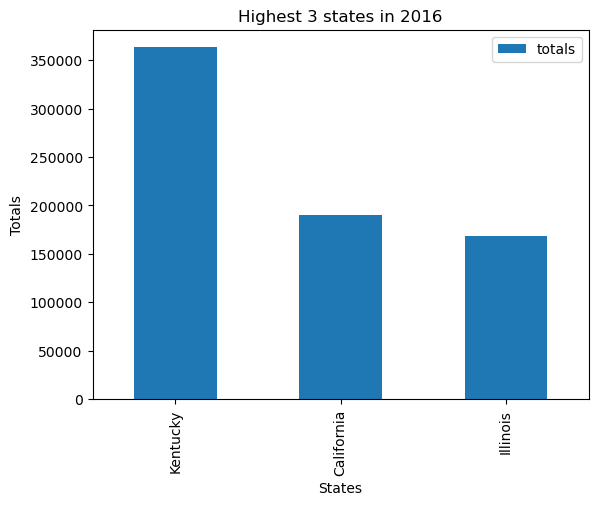

In [66]:
#Highest 3 states in 2016
guns_states16.sort_values(by=['totals'], axis = 0, ascending = False).head(3).plot.bar(x='state',y='totals');
plt.title('Highest 3 states in 2016')
plt.xlabel('States')
plt.ylabel('Totals')

Kentucky has the highest gun registration in 2016

Q3: What is the most purchased type of gun in 2017?

In [71]:
#guns in 2017
guns17=guns[guns['month']=='2017-09']
guns17.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09-01,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873


In [72]:
#sum of ['handgun','long_gun','other','multiple']
handgun=guns17['handgun'].sum()
long_gun=guns17['long_gun'].sum()
other=guns17['other'].sum()
multiple=guns17['multiple'].sum()

In [73]:
purchased=['handgun','long_gun','other','multiple']
n=[handgun,long_gun,other,multiple]
location= np.arange(len(purchased))

<BarContainer object of 4 artists>

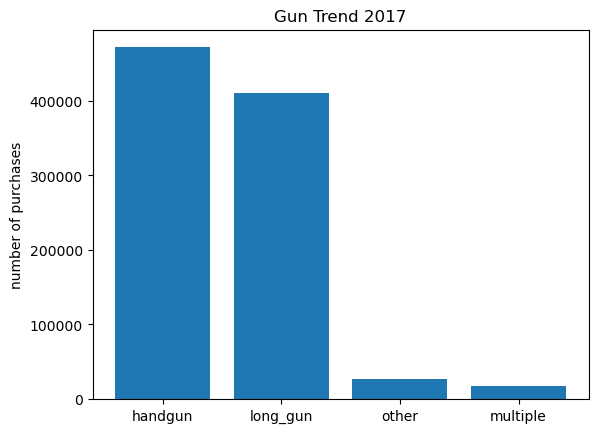

In [74]:
#most purchased type of gun in 2017
plt.xticks(location, purchased)
plt.ylabel('number of purchases')
plt.title('Gun Trend 2017')
plt.bar(location, n )

handgun is the most purchased type of gun in 2017

Text(0, 0.5, 'Number of Hanfgun')

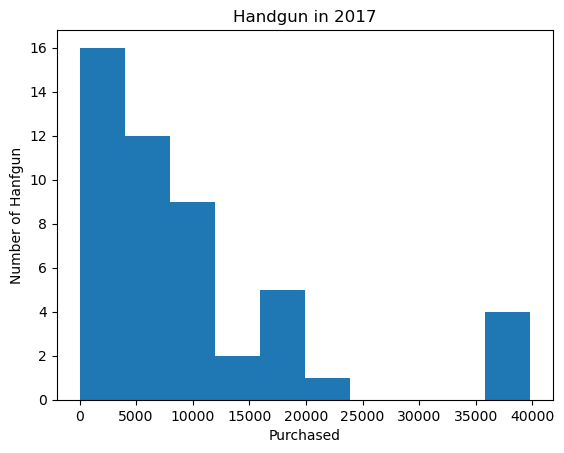

In [80]:
#handgun in 2017
plt.hist(guns17['handgun']);
plt.title('Handgun in 2017')
plt.xlabel('Purchased')
plt.ylabel('Number of Hanfgun')

<a id='conclusions'></a>
## Conclusions

> In conclusion, The gun and census data shared similar variables such as states and date. Comparing and contrasting both data by countries and date would give the idea about the gun registration per capita in 2010 and 2016. Gun registration per capita in 2010 equal to 0.398%; in 2017, gun registration per capita is equivalent to 0.678%. Additionally, states such as Kentucky, California, Texas, Florida, and Ohio are the most common states with high gun records in 2010, 2016, and 2017. The type of guns that the population in the United States purchased the most in 2017 are primarily handguns; second is the long_guns and other types of firearms.
>
> When it comes to the limitation, there are missing data for U.S colonies such as Puerto Rico, Guam, and others in census_data. It would be appropriate to include them in census data to calculate and check the result of gun per capita. Secondly, Kentucky might be an outlier among the states. By observing Kentucky from 2010,2016, 2017-- the record is surprisingly higher than other American states like Lousiana. In my opinion, it would be reasonable to recheck the data from Kentucky. In different ways, Illinois might be an outlier too because it has been registered a high gun registration in the U.S-- however, Illinois has the strictest gun control in America. It is advised to further the investigation of the states of Illinois.